# **Iot dengan kemampuan kecerdasan**

# **Scenario 1 (Driver)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq

In [ ]:
# Load the uploaded Excel file to check its content
file_path = '/content/Scenario 1_driver.xls'

# Reading the Excel file
xls = pd.ExcelFile(file_path)

# Get all sheet names to understand the structure of the file
xls.sheet_names

['Accelerometer', 'Gyroscope', 'Location', 'Metadata Device', 'Metadata Time']

In [ ]:
# Reading the 'Accelerometer' sheets into dataframes
df_accelerometer = pd.read_excel(file_path, sheet_name='Accelerometer', header=[0])

# Display the first few rows to check the data
print(df_accelerometer.head())

   Time (s)         X         Y         Z
0  0.003430  0.966839  1.882785  9.499845
1  0.023561  0.802332  1.611998  9.969568
2  0.043691  0.593665  1.855092  9.734407
3  0.063821  0.738115  1.806893  9.717193
4  0.083952  0.814905  1.778601  9.534124


In [ ]:
# Reading the 'Gyroscope' sheets into dataframes
df_gyroscope = pd.read_excel(file_path, sheet_name='Gyroscope', header=[0])

# Display the first few rows to check the data
print(df_gyroscope.head())

   Time (s)         X         Y         Z
0  0.009721 -0.010042  0.191785  0.005308
1  0.029851  0.068671  0.075224  0.003993
2  0.049982 -0.001083 -0.033753  0.005746
3  0.070112 -0.005385  0.215666  0.002005
4  0.090242  0.027745  0.158128 -0.002617


In [ ]:
# Check the column names of both sheets
print("Accelerometer Columns: ", df_accelerometer.columns)
print("Gyroscope Columns: ", df_gyroscope.columns)

Accelerometer Columns:  Index(['Time (s)', 'X', 'Y', 'Z'], dtype='object')
Gyroscope Columns:  Index(['Time (s)', 'X', 'Y', 'Z'], dtype='object')


In [ ]:
# If you want to directly access the values
acc_x = df_accelerometer['X'].values
acc_y = df_accelerometer['Y'].values
acc_z = df_accelerometer['Z'].values

gyr_x = df_gyroscope['X'].values
gyr_y = df_gyroscope['Y'].values
gyr_z = df_gyroscope['Z'].values

# **No. 1 Plot Accelerometer and gyroscope scenario 1 driver**

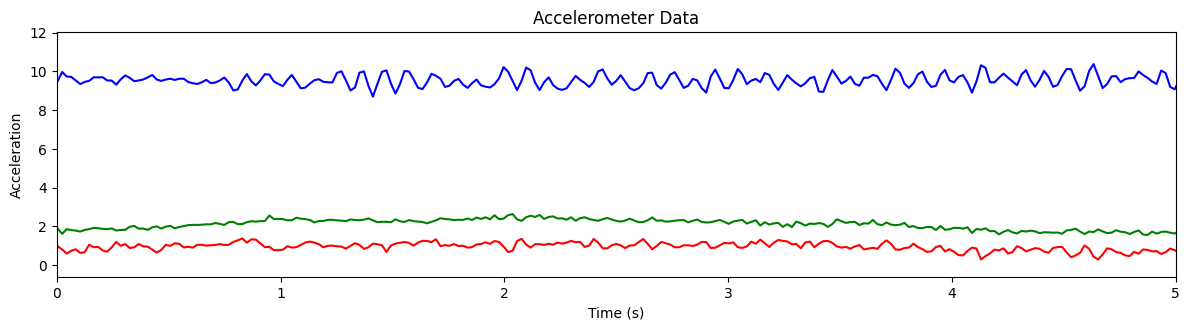

In [ ]:
# Plot Accelerometer data (assuming columns for x, y, z axes are available)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df_accelerometer['Time (s)'], acc_x, label='X-axis', color='r')
plt.plot(df_accelerometer['Time (s)'], acc_y, label='Y-axis', color='g')
plt.plot(df_accelerometer['Time (s)'], acc_z, label='Z-axis', color='b')
plt.title('Accelerometer Data')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.xlim([0, 5])  # Limit x-axis to 5 seconds

# Show the plots
plt.tight_layout()
plt.show()


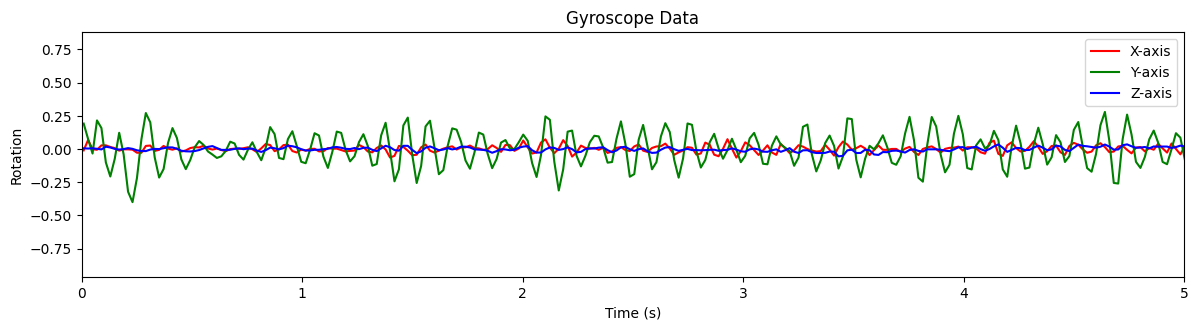

In [ ]:
# Plot Gyroscope data (assuming columns for x, y, z axes are available)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 2)
plt.plot(df_gyroscope['Time (s)'], gyr_x, label='X-axis', color='r')
plt.plot(df_gyroscope['Time (s)'], gyr_y, label='Y-axis', color='g')
plt.plot(df_gyroscope['Time (s)'], gyr_z, label='Z-axis', color='b')
plt.title('Gyroscope Data')
plt.xlabel('Time (s)')
plt.ylabel('Rotation')
plt.xlim([0, 5])  # Limit x-axis to 5 seconds
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# **No. 2 Plot Spectrum Accelerometer and Spectrum Gyroscope**

In [ ]:
# Define the FFT function
def compute_fft(signal, sampling_rate=50):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1/sampling_rate)
    return xf, np.abs(yf)

In [ ]:
#FFT for every axis
acc_x_freq, acc_x_spectrum = compute_fft(acc_x)
acc_y_freq, acc_y_spectrum = compute_fft(acc_y)
acc_z_freq, acc_z_spectrum = compute_fft(acc_z)

gyr_x_freq, gyr_x_spectrum = compute_fft(gyr_x)
gyr_y_freq, gyr_y_spectrum = compute_fft(gyr_y)
gyr_z_freq, gyr_z_spectrum = compute_fft(gyr_z)

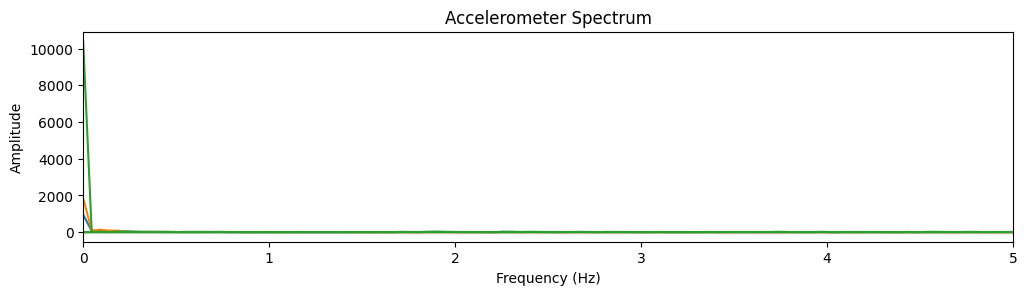

In [ ]:
#subplot 1: accelerometer spectrum
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(acc_x_freq, acc_x_spectrum, label='acc_x')
plt.plot(acc_y_freq, acc_y_spectrum, label='acc_y')
plt.plot(acc_z_freq, acc_z_spectrum, label='acc_z')
plt.title('Accelerometer Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim([0, 5])  # Limit x-axis to 5 seconds
plt.show()

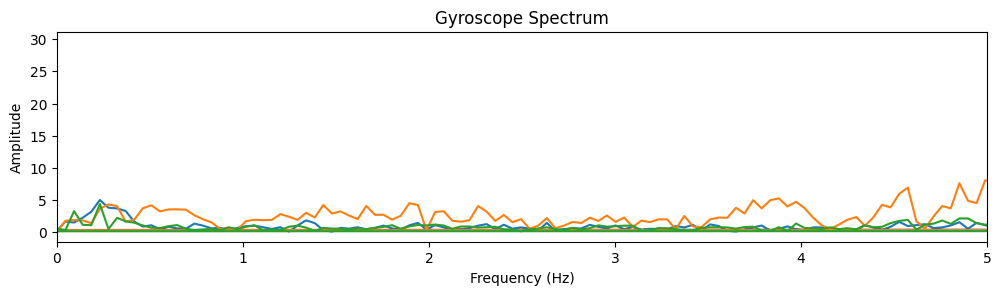

In [ ]:
#subplot 2: gyroscope spectrum
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(gyr_x_freq, gyr_x_spectrum, label='gyr_x')
plt.plot(gyr_y_freq, gyr_y_spectrum, label='gyr_y')
plt.plot(gyr_z_freq, gyr_z_spectrum, label='gyr_z')
plt.title('Gyroscope Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim([0, 5])  # Limit x-axis to 5 seconds
plt.show()